#### Classifying movie reviews: a binary classification example
###### 3.4.1 The IMDB dataset
- Samples 50,000 review samples
- 25,000 for training and 25,000 for testing
- 50% Negative and 50% positive Reviews
- Available in Kears pre data sets
- pre converted in Vector numbers where each number replace spacifice word :)
- 80 Mb data size download when you first run otherwise you can see this data set file in .keras folder

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
# num_words means most frequent words which comes in the dataset atleast 1 or 10,000 times
# The argument num_words=10000 means you’ll only keep the top 10,000 most frequently occurring words in the training data.

In [2]:
print("X:\n",train_data[[0]]) # X has words but are encoded in numbers and the number show in X are index numbers of words 
print("Y:\n",train_labels[0]) # train_labels == 0 means -ve, train_labels == 1 means +ve 

X:
 [list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])]
Y:
 1


In [3]:
# different person wrote different reviews on same movie 
print(len(train_data[0]))
print(len(train_data[1]))

218
189


In [4]:
# 1.  2.     3.    4  5   6   -----> this are index of each number 
#[we love Pakistan, I am Pakistani ]

#[5,2,3,6,1,4] ---> above code is encode 
#[am love Pakistan Pakistani we i] ---> decode

# you think that at backend You have different columns and they have data as above 

In [5]:
max([max(sequence) for sequence in train_data])
# here it goes to train_data see each sequence and take max value of each then it take max value among those max values

9999

In [6]:
word_index = imdb.get_word_index()
# get_word_index() is function which set indexes for the words and indexes are stored in dictionary of word_index 

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# you create a dict which run inside word_index{} which sweep keys into values and values into keys 
# above line of code convert value into key and key into value  

decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
# 
"""
reverse_word_index is dictionary in which it calls get() of dict in it apply a formule says i - 3, ? means whatever you got 
index from train_data[0] take position of i subract that from 3 then you will get a particular number check if any word
avaliable on that number print that text otherwise replace that by ? then join them by take-string and save that into
decoded_review variable 
"""

'\nreverse_word_index is dictionary in which it calls get() of dict in it apply a formule says i - 3, ? means whatever you got \nindex from train_data[0] take position of i subract that from 3 then you will get a particular number check if any word\navaliable on that number print that text otherwise replace that by ? then join them by take-string and save that into\ndecoded_review variable \n'

In [7]:
word_index # this dictionary having every word and its index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [8]:
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [9]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### 3.4.2 Preparing the data

In [10]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
        
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
        
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [12]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [13]:
x_test[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [14]:
train_labels

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [15]:
test_labels

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [16]:
#You should also vectorize your labels, which is straightforward:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [17]:
y_test

array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)

In [18]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [19]:
#3.4.3 Building your network
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) # sigmoid function bring values b/w 1 to -1 

In [20]:
# Listing 3.4 Compiling the model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#### This is hold-out validation 

In [21]:
#Listing 3.7 Setting aside a validation set
x_val = x_train[:10000] # x_train upto 10,000
partial_x_train = x_train[10000:] # x_train beyond the 10,000 

In [22]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [23]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val)) # the unseen validation_data will be on (x_val, y_val)
# in the output you will see the normal loss and accuracy meanwhile validation loss and accuracy 

Epoch 1/20
30/30 [==============================] - 13s 292ms/step - loss: 0.5104 - accuracy: 0.7865 - val_loss: 0.3804 - val_accuracy: 0.8745
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3039 - accuracy: 0.9035 - val_loss: 0.3051 - val_accuracy: 0.8883
Epoch 3/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2259 - accuracy: 0.9274 - val_loss: 0.2831 - val_accuracy: 0.8894
Epoch 4/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1800 - accuracy: 0.9413 - val_loss: 0.2761 - val_accuracy: 0.8905
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1450 - accuracy: 0.9551 - val_loss: 0.2829 - val_accuracy: 0.8887
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1225 - accuracy: 0.9625 - val_loss: 0.2980 - val_accuracy: 0.8847
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1015 - accuracy: 0.9696 - val_loss: 0.3515 - val_accuracy: 0.8688
Epoch 8/20


In [24]:
history_dict = history.history
print(history_dict.keys())
print(history_dict.values())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
dict_values([[0.510439395904541, 0.3039180040359497, 0.22588424384593964, 0.18001607060432434, 0.14499613642692566, 0.12252171337604523, 0.10152672976255417, 0.08488917350769043, 0.06960324943065643, 0.059172626584768295, 0.04823186993598938, 0.03910472244024277, 0.032315462827682495, 0.027994366362690926, 0.020425710827112198, 0.016302114352583885, 0.013594774529337883, 0.010786276310682297, 0.008081893436610699, 0.00706025306135416], [0.786466658115387, 0.9034666419029236, 0.9273999929428101, 0.9413333535194397, 0.955133318901062, 0.9624666571617126, 0.9696000218391418, 0.9757999777793884, 0.98253333568573, 0.984666645526886, 0.9878666400909424, 0.991599977016449, 0.9940666556358337, 0.9941999912261963, 0.996999979019165, 0.9983333349227905, 0.9987333416938782, 0.9989333152770996, 0.9991999864578247, 0.9994000196456909], [0.38043850660324097, 0.30514228343963623, 0.28310391306877136, 0.27607524394989014, 0.28291186690330505,

#### Listing 3.9 Plotting the training and validation loss

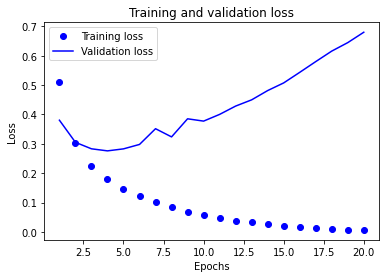

In [25]:
import matplotlib.pyplot as plt
history_dict = history.history

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# here you see the on every epochtraining loss getting decreased but validation getting increased 
# this is sign of over fitting 
# we can identify where our model over fit which epoch no 4
# we stop over fitting 
# loss has more value then accuracy 

#### Listing 3.10 Plotting the training and validation accuracy

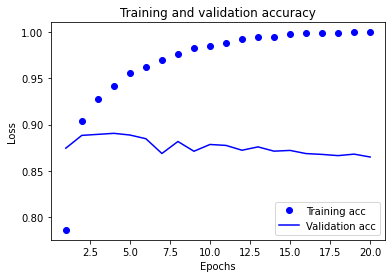

In [26]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Listing 3.10 Plotting the training and validation accuracy

In [27]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 4s 43ms/step - loss: 0.4558 - accuracy: 0.8134
Epoch 2/4
49/49 [==============================] - 1s 22ms/step - loss: 0.2612 - accuracy: 0.9083
Epoch 3/4
49/49 [==============================] - 1s 25ms/step - loss: 0.2031 - accuracy: 0.9279
Epoch 4/4
782/782 [==============================] - 4s 4ms/step - loss: 0.2960 - accuracy: 0.8823


In [29]:
results
# This fairly naive approach achieves an accuracy of 88%. With state-of-the-art approaches, you should be able to get close to 95%.

[0.2960094213485718, 0.882319986820221]

#### 3.4.5 Using a trained network to generate predictions on new data

In [30]:
model.predict(x_test)
# the value above 0.5 is +ve and below it is -ve

782/782 [==============================] - 5s 3ms/step


array([[0.14221849],
       [0.9996725 ],
       [0.8075794 ],
       ...,
       [0.12425706],
       [0.06828719],
       [0.6073006 ]], dtype=float32)